In [228]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
from cmath import sqrt as sqrt

In [186]:
def problem_1(A,b):
    Q,R = la.qr(A,mode='economic')
    y = np.dot(Q.T,b)
    return la.solve_triangular(R,y)

In [187]:
A = np.array([[1,0,4],[1,1,6],[-3,0,-10],[4,9,2],[-33,2,5]])
b = np.array([3,5,2,4,2])
x = problem_1(A, b)
print(abs(x-np.linalg.lstsq(A,b)[0])<1e-10)

[ True  True  True]


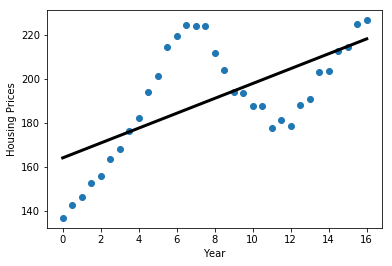

In [188]:
#Problem 2
df = np.load('/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk3_Decomp/housing.npy')  
A = np.column_stack((df.T[0,:],np.ones(df.shape[0])))
b = df.T[1,:]
x = problem_1(A,b)
a = x[0]
b = x[1]
plt.scatter(df.T[0,:],df.T[1,:])
plt.plot(df.T[0,:],a*df.T[0,:]+b,marker='None',lw=3,color='black')
plt.xlabel('Year')
plt.ylabel('Housing Prices')
plt.savefig('Housing LS')
plt.show()

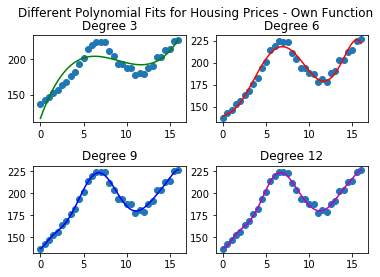

In [81]:
b = df.T[1,:]

#Problem 3
def f(deg):
    A = np.vander(df.T[0,:],deg+1)
    return np.poly1d(la.lstsq(A,b)[0])

x = np.linspace(0,16,100)
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplot(221)
plt.scatter(df.T[0,:],df.T[1,:])
plt.plot(x,f(3)(x),'g-')
plt.title('Degree 3')

plt.subplot(222)
plt.scatter(df.T[0,:],df.T[1,:])
plt.plot(x,f(6)(x),'r-')
plt.title('Degree 6')

plt.subplot(223)
plt.scatter(df.T[0,:],df.T[1,:])
plt.plot(x,f(9)(x),'b-')
plt.title('Degree 9')

plt.subplot(224)
plt.scatter(df.T[0,:],df.T[1,:])
plt.plot(x,f(12)(x),'m-')
plt.title('Degree 12')

fig.subplots_adjust(hspace=.5)
plt.suptitle('Different Polynomial Fits for Housing Prices - Own Function')
plt.savefig('Housing Poly')
plt.show()

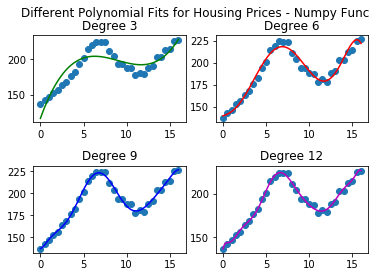

In [82]:
x = np.linspace(0,16,100)

fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplot(221)
plt.scatter(df.T[0,:],df.T[1,:])
plt.plot(x,np.poly1d(np.polyfit(df.T[0,:],df.T[1,:],3))(x),'g-')
plt.title('Degree 3')

plt.subplot(222)
plt.scatter(df.T[0,:],df.T[1,:])
plt.plot(x,np.poly1d(np.polyfit(df.T[0,:],df.T[1,:],6))(x),'r-')
plt.title('Degree 6')

plt.subplot(223)
plt.scatter(df.T[0,:],df.T[1,:])
plt.plot(x,np.poly1d(np.polyfit(df.T[0,:],df.T[1,:],9))(x),'b-')
plt.title('Degree 9')

plt.subplot(224)
plt.scatter(df.T[0,:],df.T[1,:])
plt.plot(x,np.poly1d(np.polyfit(df.T[0,:],df.T[1,:],12))(x),'m-')
plt.title('Degree 12')

fig.subplots_adjust(hspace=.5)
plt.suptitle('Different Polynomial Fits for Housing Prices - Numpy Func')
plt.show()

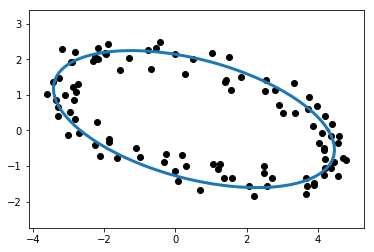

In [113]:
#Problem 4
xk, yk = np.load("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk3_Decomp/ellipse.npy").T
A = np.column_stack((xk**2,xk,xk*yk,yk,yk**2))
b = np.ones_like(xk)

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=3)
    plt.gca().set_aspect("equal", "datalim")

coeff = problem_1(A,b)
a = coeff[0]
b = coeff[1]
c = coeff[2]
d = coeff[3]
e = coeff[4]

plot_ellipse(a,b,c,d,e)
plt.scatter(xk,yk,c='black')
plt.show()

In [172]:
def problem_5(A, N=100000, tol=1e-13):
    m,n=A.shape
    x = np.random.random((10,1))
    x = x/la.norm(x)
    k = 1
    err = 100
    while k <= N and err > tol:
        x_new = np.dot(A,x)
        x_new = x_new/la.norm(x_new)
        err = la.norm(x_new-x)
        k += 1
        x = x_new
    eig = np.dot(x.T,np.dot(A,x))
    return eig,x.T

In [173]:
A = np.random.random((10,10))
eig, x = problem_5(A)
print(np.allclose(A.dot(x.T),eig*x.T))

# Test compared to SciPy's eigenvalue solver
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb, vec = eigs[loc], vecs[:,loc]

print(abs(lamb-eig)<1e-7)
print(la.norm(vec-x)<1e-5)

True
[[ True]]
True


In [249]:
def problem_6(A, N=10000, tol=1e-10):
    m,n=A.shape
    S=la.hessenberg(A)
    for k in range(N):
        Q,R = la.qr(S,mode='economic')
        S = np.dot(R,Q)
    eigs = np.array([])
    i = 0
    while i<n:
        if i==(n-1) or abs(S[i+1,i])<tol:
            eigs = np.append(eigs,[[S[i,i]]])
        else:
            S_i = np.array([[S[i,i],S[i,i+1]],[S[i+1,i],S[i+1,i+1]]])
            a = 1
            b = -(S_i[0,0]+S_i[1,1])
            c = S_i[0,0]*S_i[1,1]-S_i[0,1]*S_i[1,0]
            x1 = (-b+sqrt(b**2-4*a*c))/(2*a)
            x2 = (-b-sqrt(b**2-4*a*c))/(2*a)
            eigs = np.append(eigs,[[x1,x2]])
            i = i+1
        i = i+1
    return eigs

In [259]:
A = np.random.random((3,3))
B = A+A.T
print(problem_6(A))
print(la.eig(A)[0])

[ 1.26962217+0.j          0.16895406+0.15208381j  0.16895406-0.15208381j]
[ 1.26962217+0.j          0.16895406+0.15208381j  0.16895406-0.15208381j]
